# Prepare our Iris Dataset

In [1]:
from sklearn.datasets import load_iris
iris_db = load_iris()
X = iris_db.data
y = iris_db.target

Now `X` is an array, you can try

```python
type(X) 
dir(X)  # functions / interfaced provided by the object X
X.shape # how many rows / columns in an array
```

Note `X` is now an array managed by the `numpy` library. We can also let `torch` to handle it by
```python
X_t = torch.Tensor(X)
```

Each row of `X` represents one data sample. Try to run a cell of `X[0]`, it will show the 4 attributes of that sample.

# Construct linear model

The simplest way to define a _perceptron_, i.e. a linear model of `X` variables with a non-linear transformation is to 
i) define the weights for the learning part (ignore the bias term for now)

In [3]:
i = 100
x1, x2, x3, x4 = X[i]

w1 = - 0.4
w2 = 0.3
w3 = 0.5
w4 = -0.7

s = w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4

# s for "sum", the weighted sum of 4 x-variables

# Non linear map

Let's consider the non-linear map

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def relu(pre_a):
    return np.maximum(pre_a, 0) # elementise taking the max of the two inputs

If s<0, returns 0, if s>=0, returens s.

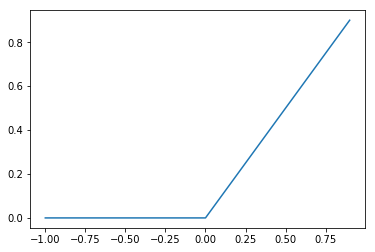

In [13]:
ss = np.arange(-1, 1, 0.1)
rr = relu(ss)
plt.plot(ss, rr)

__Sigmoid function__

$ a = \frac{1}{1 + \exp(-s)}$, $e=?$

In [ ]:
# s = -15 
# Test here s large or small
1/ (np.exp(15) + 1)

In [ ]:
x = np.arange(-15, 15, 0.01)
y = 1 / (1+np.exp(-x))

In [ ]:
plt.plot(x, y) # Add x-y labels.
plt.show() # sigmoid

# Multi-layer neural network

In [ ]:
import torch
import torch.nn as nn

In [ ]:
lm1 = nn.Linear(in_features=4, out_features=64)
lm2 = nn.Linear(in_features=64, out_features=32)
lm3 = nn.Linear(in_features=32, out_features=3)
dnn = nn.Sequential(
    lm1,
    nn.ReLU(),
    lm2, 
    nn.ReLU(),
    lm3)


In [ ]:
# data
X_t = torch.Tensor(X)
y_t = torch.LongTensor(iris_db.target)

In [ ]:
from torch.optim import Adam
optim = Adam(dnn.parameters())

for i in range(50):
    out = torch.log_softmax(dnn(X_t), dim=1)
    loss = nn.functional.nll_loss(out, y_t)
    optim.zero_grad()
    loss.backward()
    optim.step()
    print(i, loss)

In [ ]:
plt.figure(figsize=(60, 8))
plt.imshow(out.data.numpy())
plt.show()

In [ ]:
plt.plot(x, np.sin(x)) # Add x-y labels.
plt.show()

# Consider back-propagation

Let us compute the derivation w.r.t. $a$
$
\frac{d}{da} \frac{1}{1+e^{-a}} = y \\
=  - \frac{1}{1+e^{-a}} \frac{1}{1+e^{-a}} \cdot \frac{d}{da} ({1+e^{-a}}) \\
= - y^2 \cdot e^{-a} \cdot \frac{d}{da} (-a) \\
= y \cdot \frac{e^{-a}}{1+e^{-a}} \\
= y (1-y)
$

In [ ]:

s = - 0.28
w1 = - 0.4
w2 = 0.3
w3 = 0.5
w4 = -0.7
x1, x2, x3, x4 = 6.3, 3.3, 6., 2.5

s = w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4

# delta_w1 = 0.001
# w1_new = w1 + delta_w1
# s_new = w1_new * x1 + w2 * x2 + w3 * x3 + w4 * x4

delta_x1 = 0.001
x1_new = x1 + delta_x1
s_new = w1 * x1_new + w2 * x2 + w3 * x3 + w4 * x4


a = 1 / (1 + np.exp(-s))
delta_s = 0.0005
#s_new = s + delta_s
a_new = 1 / (1 + np.exp(-s_new))
print("a ", a, "changed to", a_new)
print("by", (a_new-a))
#print("deriv to s", (a_new-a)/delta_s)
print("deriv = a * (1-a)", (a*(1-a)))

# print("deriv to w1", (a_new-a)/delta_w1)
# print("deriv to w1 = a * (1-a) * x1", (a*(1-a))*x1)

print("deriv to x1", (a_new-a)/delta_w1)
print("deriv to x1 = a * (1-a) * w1", (a*(1-a))*w1)

In [15]:
# draw d/dx sigmoid(x) w.r.t. x
plt.plot(x, y*(1-y))
plt.show()

NameError: name 'x' is not defined